# Artificial Intelligence / CNN - Decompossed
## ...but first, we will need some image metadata

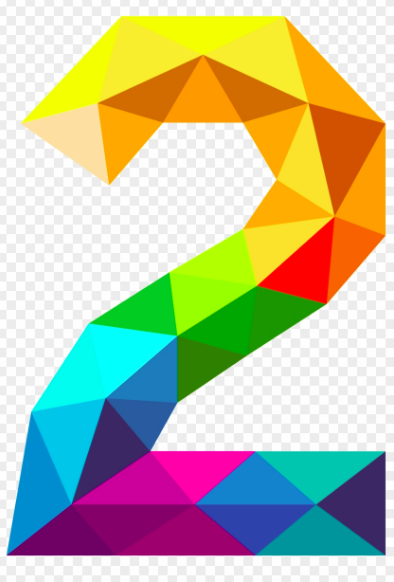

In [1]:
# start with image, kept grey checkers to keep it interesting
# image from https://www.clipartmax.com/middle/m2i8K9H7A0G6i8H7_pin-by-adriana-gramajo-on-abcdarios-numero-2-arco-iris/
from PIL import Image
image_file = './imgs/two.orig.png'
orig = Image.open(image_file)
display(orig)

### get metadata, height, weight, channels if alpha exists

An image contains channels, typically the channels are the colors, and possibly the alpha channel, which sets the level of transparency.  
On \*nix systems, the 'identify' command sets or gets image metadata, like dimensions and color scheme.

In [2]:
# get image meta-data, height, width, channels 
!identify {image_file}
height_raw = !identify -format '%h' {image_file}
height_raw = int(height_raw[0])
width_raw = !identify -format '%w' {image_file}
width_raw = int(width_raw[0])
has_alpha_channel = !identify -format '%A' {image_file}
has_alpha_channel = has_alpha_channel[0]
channel_cnt = 3
if has_alpha_channel:
    channel_cnt = 4
# only 3 channels, red, green, blue, no alpha
channel_size = width_raw * height_raw
print('image height  : ', height_raw)
print('image width   : ', width_raw)
print('channel count : ', channel_cnt)

./imgs/two.orig.png PNG 394x582 394x582+0+0 8-bit sRGB 79.3KB 0.000u 0:00.000
image height  :  582
image width   :  394
channel count :  4


### let's define a function that returns image metadata and color channels as lists

below added to http://localhost:8888/edit/AI_Decomposed.py

In [3]:
def image_meta(image_file):
    img = Image.open(image_file)
    width, height = img.size    
    channel_cnt = 3
    channel_size = width * height    
    pixels = list(img.getdata())
    red = list()
    green = list()
    blue = list()
    # will discard alpha channel
    for quadruple in pixels:
        red.append(quadruple[0])
        green.append(quadruple[1])
        blue.append(quadruple[2])
    
    return [height, width, red, green, blue]    

### test new function

In [4]:
[h,w,r,g,b] = image_meta('./imgs/two.orig.png')

394  x  582


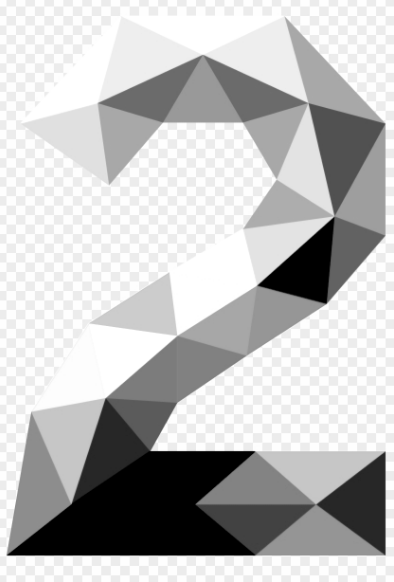

In [5]:
img = Image.new('L', (w, h))
print(w, ' x ', h)
img.putdata(g)
display(img)

### let's write a function for displaying channels

below added to http://localhost:8888/edit/AI_Decomposed.py

In [6]:
def display_channel(pixels, width):
    from PIL import Image
    height = (int) (len(pixels)/width)
    img = Image.new('L', (width, height))
    img.putdata(pixels)
    display(img)

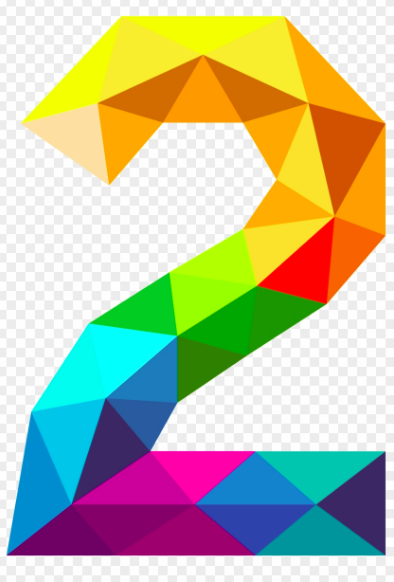

In [7]:
# first display original image
image_file = './imgs/two.orig.png'
orig = Image.open(image_file)
display(orig)

red channel


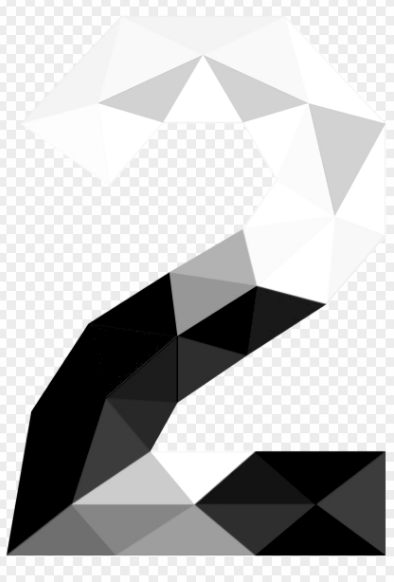

In [8]:
print('red channel')
display_channel(r,w)

green channel


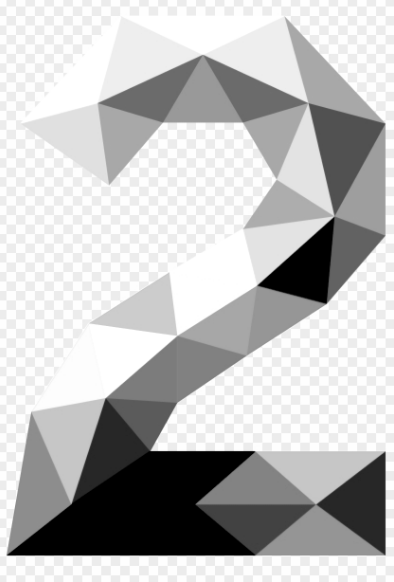

In [9]:
print('green channel')
display_channel(g,w)

blue channel


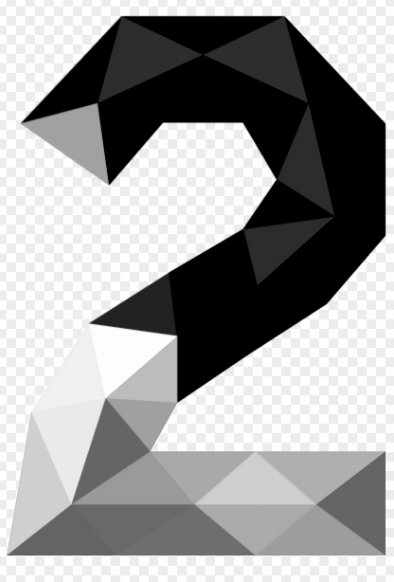

In [10]:
print('blue channel')
display_channel(b,w)